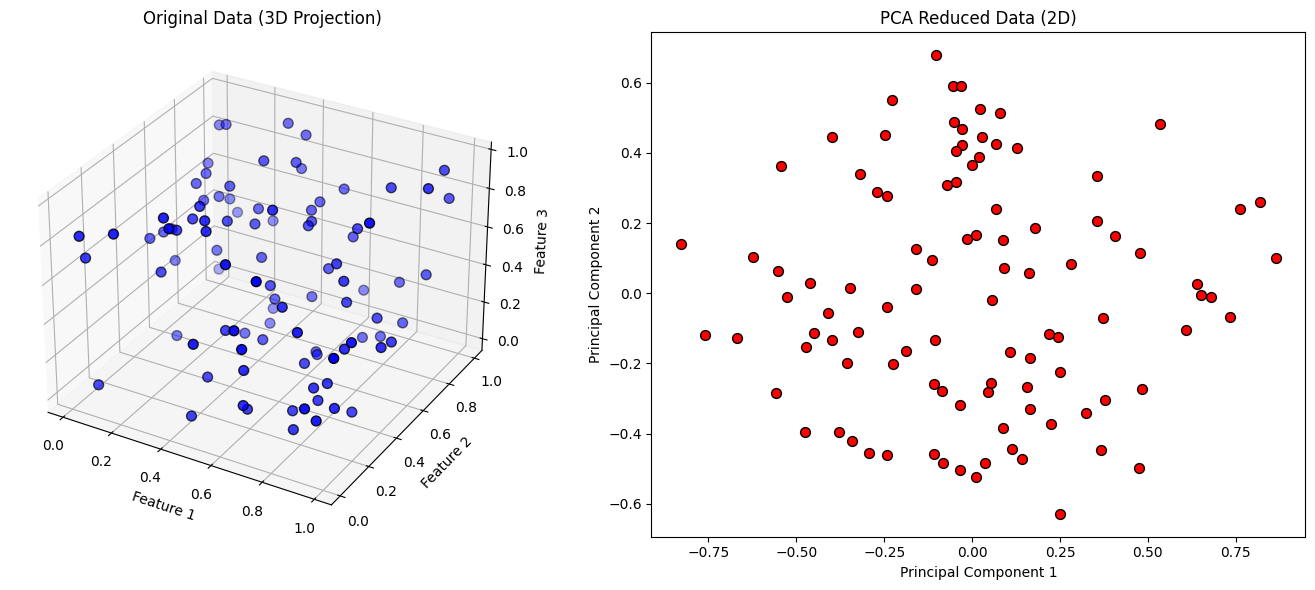

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Generate random data points with 5 features
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 5)  # 100 samples, 5 features

# Create a 3D plot for the original data (projected to 3D)
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c='blue', edgecolor='k', s=50)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.set_title('Original Data (3D Projection)')

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a 2D plot for the PCA-reduced data
ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c='red', edgecolor='k', s=50)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('PCA Reduced Data (2D)')

plt.tight_layout()
plt.show()


Explained variance ratio: [0.28777948 0.21193578]
Total explained variance: 0.499715258130612


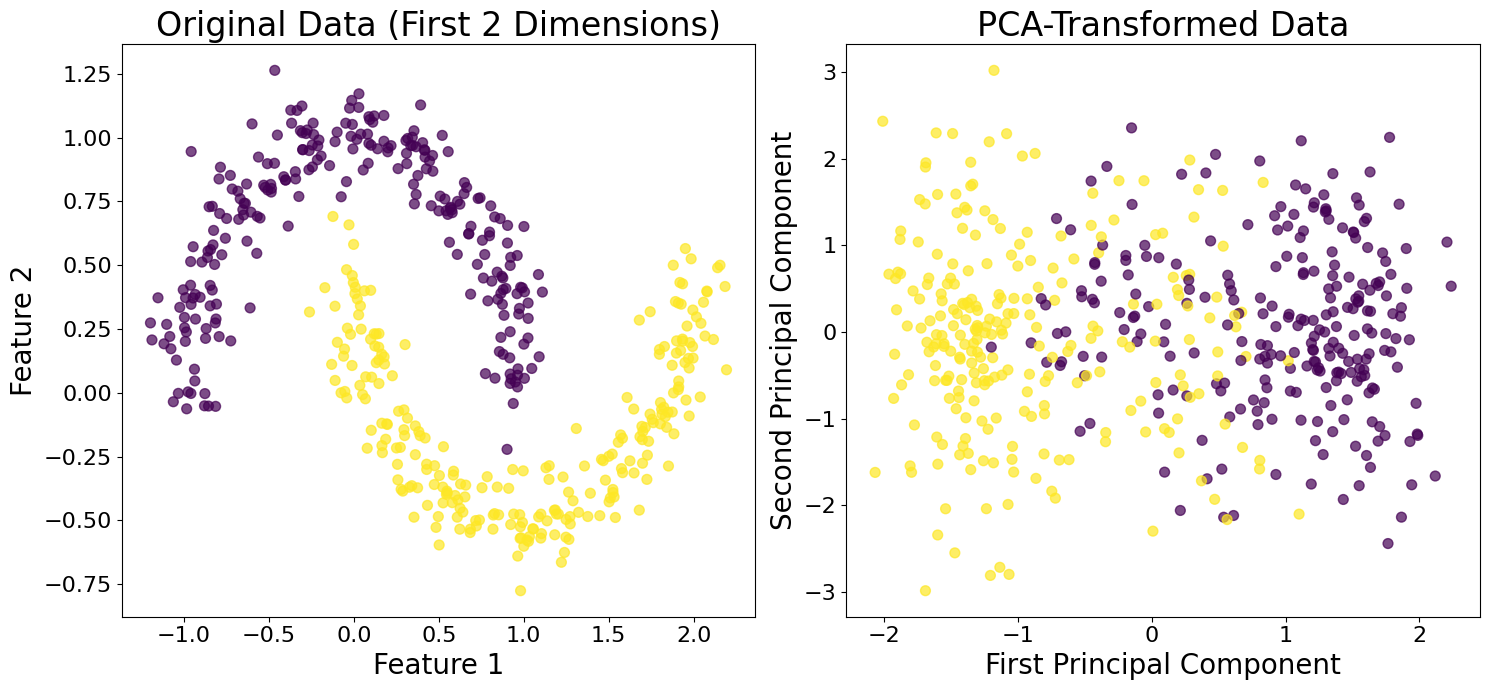

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Generate complex dataset
def generate_data(n_samples=500):
    # Generate two interleaving moons
    X1, y1 = make_moons(n_samples=n_samples, noise=0.1)

    # Add some random noise dimensions
    noise_dims = np.random.randn(n_samples, 3) * 0.1
    X = np.hstack((X1, noise_dims))

    return X, y1

# Generate the data
X, y = generate_data(n_samples=500)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Original data (first two dimensions)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7, s=50)
ax1.set_title('Original Data (First 2 Dimensions)', fontsize=24)
ax1.set_xlabel('Feature 1', fontsize=20)
ax1.set_ylabel('Feature 2', fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=16)

# PCA-transformed data
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, s=50)
ax2.set_title('PCA-Transformed Data', fontsize=24)
ax2.set_xlabel('First Principal Component', fontsize=20)
ax2.set_ylabel('Second Principal Component', fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()



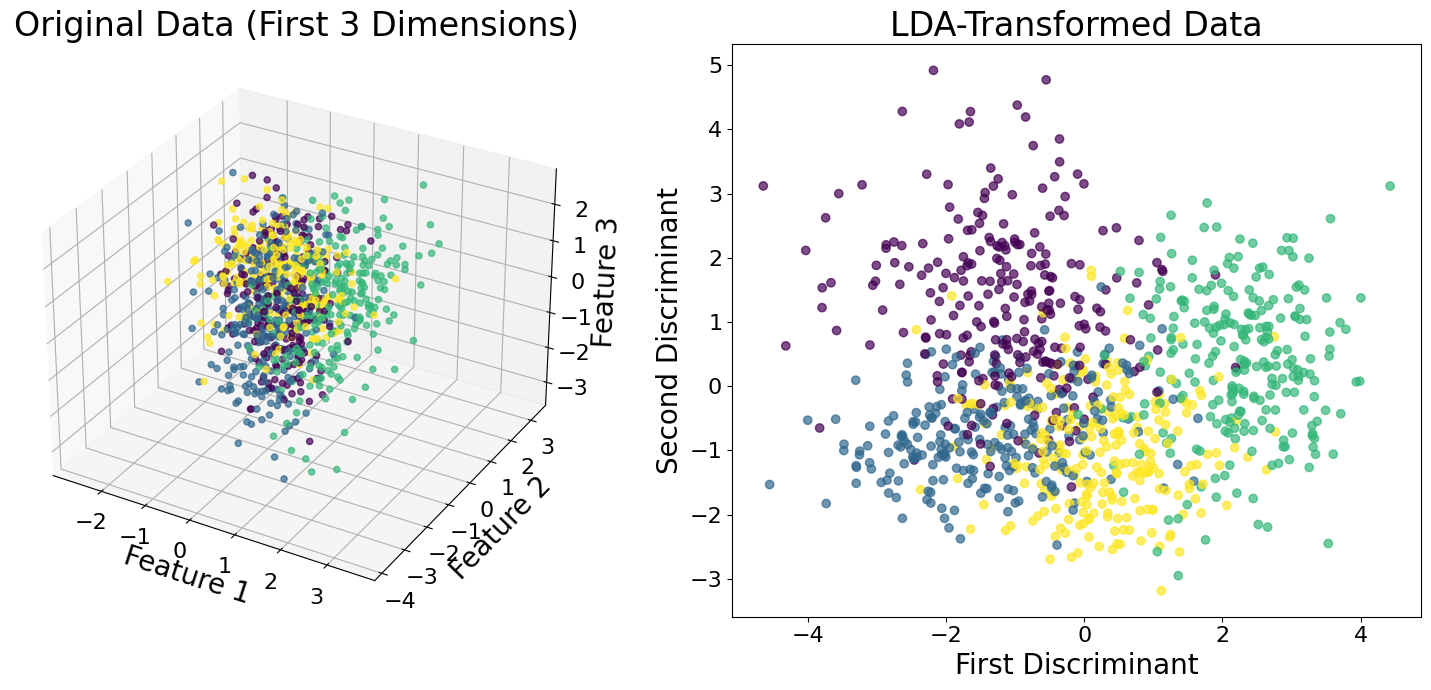

Explained variance ratio: [0.56283476 0.23334875]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate complex dataset
def generate_complex_data_lda(n_samples=1000, n_features=20, n_classes=4):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes,
                               n_informative=10, n_redundant=5, n_repeated=3,
                               n_clusters_per_class=2, class_sep=1.5, random_state=42)
    return X, y

# Generate the complex data
X, y = generate_complex_data_lda(n_samples=1000)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Create plots
fig = plt.figure(figsize=(15,7))

# Original data (first three dimensions) in 3D
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y, cmap='viridis', alpha=0.7)
ax1.set_title('Original Data (First 3 Dimensions)', fontsize=24)
ax1.set_xlabel('Feature 1', fontsize=20)
ax1.set_ylabel('Feature 2', fontsize=20)
ax1.set_zlabel('Feature 3', fontsize=20)

# LDA-transformed data
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', alpha=0.7)
ax2.set_title('LDA-Transformed Data', fontsize=24)
ax2.set_xlabel('First Discriminant', fontsize=20)
ax2.set_ylabel('Second Discriminant', fontsize=20)

# Increase tick label size
for ax in [ax1, ax2]:
    ax.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

# Print the explained variance ratio
print("Explained variance ratio:", lda.explained_variance_ratio_)

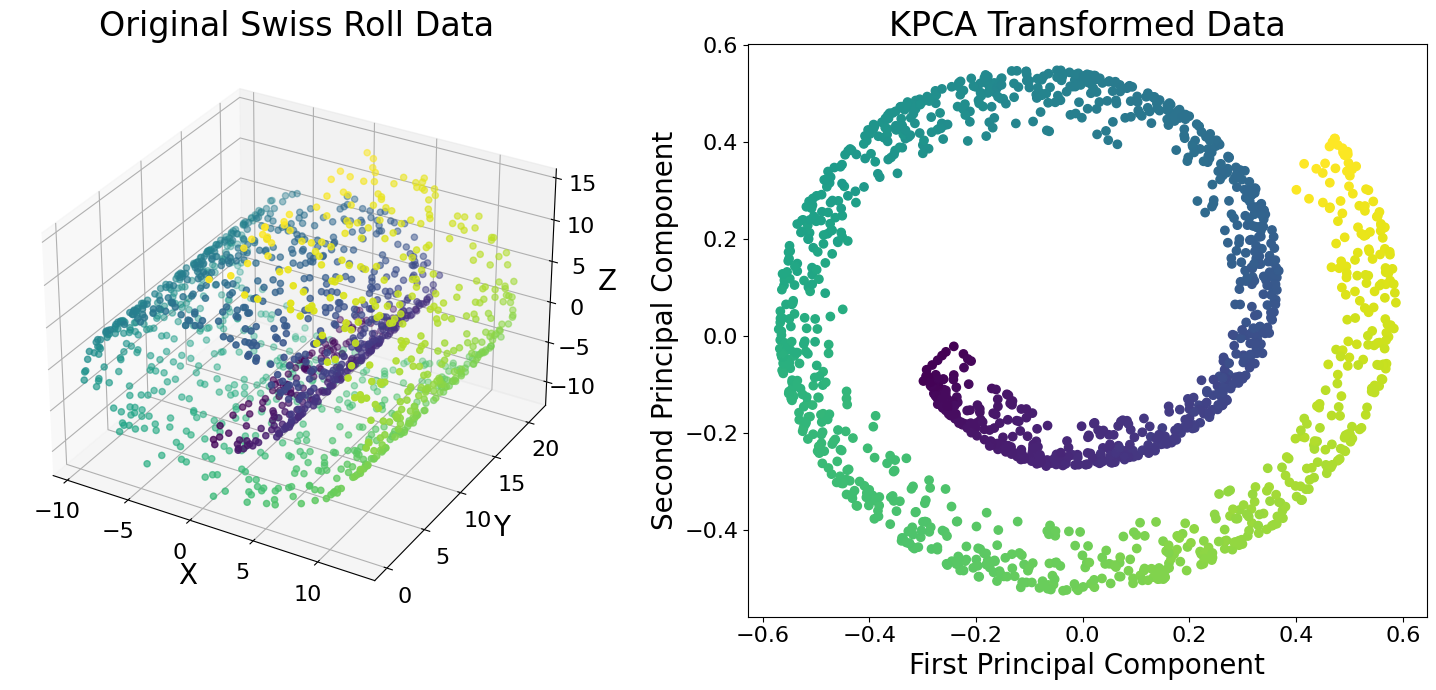

Explained variance ratio not available for KernelPCA


In [28]:
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

# Generate Swiss roll data
n_samples = 1500
noise = 0.05
X, color = make_swiss_roll(n_samples, noise=noise)







# Perform KPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.002)
X_kpca = kpca.fit_transform(X)

# Create plots
fig = plt.figure(figsize=(15, 7))

# Original 3D Swiss roll
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='viridis')
ax1.set_title('Original Swiss Roll Data', fontsize=24)
ax1.set_xlabel('X', fontsize=20)
ax1.set_ylabel('Y', fontsize=20)
ax1.set_zlabel('Z', fontsize=20)

# KPCA-transformed data



ax2 = fig.add_subplot(122)
scatter = ax2.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color, cmap='viridis')
ax2.set_title('KPCA Transformed Data', fontsize=24)
ax2.set_xlabel('First Principal Component', fontsize=20)
ax2.set_ylabel('Second Principal Component', fontsize=20)

# Increase tick label size
for ax in [ax1, ax2]:
    ax.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

# Print the explained variance ratio (if available)
if hasattr(kpca, 'lambdas_'):
    explained_variance_ratio = kpca.lambdas_ / np.sum(kpca.lambdas_)
    print("Explained variance ratio:", explained_variance_ratio[:2])
    print("Total explained variance:", np.sum(explained_variance_ratio[:2]))
else:
    print("Explained variance ratio not available for KernelPCA")